# Data Preparation - LMA Features Data

## Imports

In [1]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from collections import Counter
import numpy as np

### Load Dataset

In [2]:
#data = pd.read_csv('datasets/pa/LMA_DATA.csv')
data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA.csv')

In [3]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175,-0.5,0.6
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057,-0.5,0.6
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173,-0.5,0.6
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941,-0.5,0.6
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854,-0.5,0.6


## Feature Selection

In [4]:
#data = pd.read_csv('datasets/pa/LMA_DATA.csv')
data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA.csv')

In [5]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.013351,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001902,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,0.005425,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.045460,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.340085,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854


### Variance Analysis

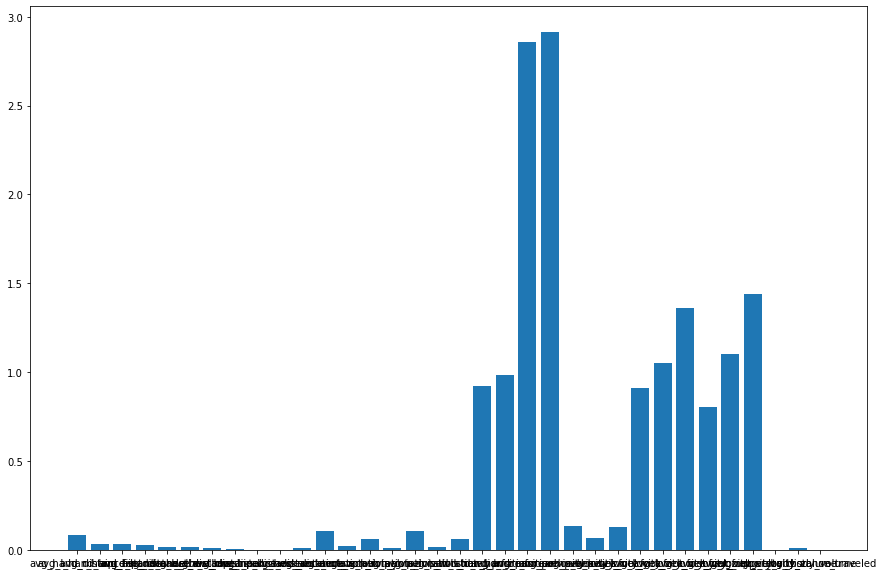

avg_hand_distance  -  0.08174811325132066
avg_l_hand_hip_distance  -  0.03147546547226951
avg_r_hand_hip_distance  -  0.033536563015694354
avg_feet_distance  -  0.024910753711414255
avg_l_hand_chest_distance  -  0.014937310265632298
avg_r_hand_chest_distance  -  0.014511153686681065
avg_l_elbow_hip_distance  -  0.007934734537872728
avg_r_elbow_hip_distance  -  0.0077443814124406605
avg_chest_pelvis_distance  -  5.130382656225023e-19
avg_neck_chest_distance  -  1.4091403304634786e-05
avg_neck_rotation_w  -  0.0124669936797872
avg_neck_rotation_x  -  0.10354725228948151
avg_neck_rotation_y  -  0.02326666762523902
avg_neck_rotation_z  -  0.06271603538400689
avg_pelvis_rotation_w  -  0.007854094364472061
avg_pelvis_rotation_x  -  0.10794947039134874
avg_pelvis_rotation_y  -  0.01623381088394334
avg_pelvis_rotation_z  -  0.05947882827433601
std_l_hand_position  -  0.9196184672396858
std_r_hand_position  -  0.9840870458230042
avg_l_forearm_velocity  -  2.855198210196509
avg_r_forearm_velocit

In [6]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [7]:
#data = pd.read_csv('datasets/pa/LMA_DATA.csv')
data = pd.read_csv('datasets/pa/LMA_DATA_EXTRA.csv')

In [8]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)
X = data

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.013351,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001902,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,0.005425,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.045460,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.340085,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854


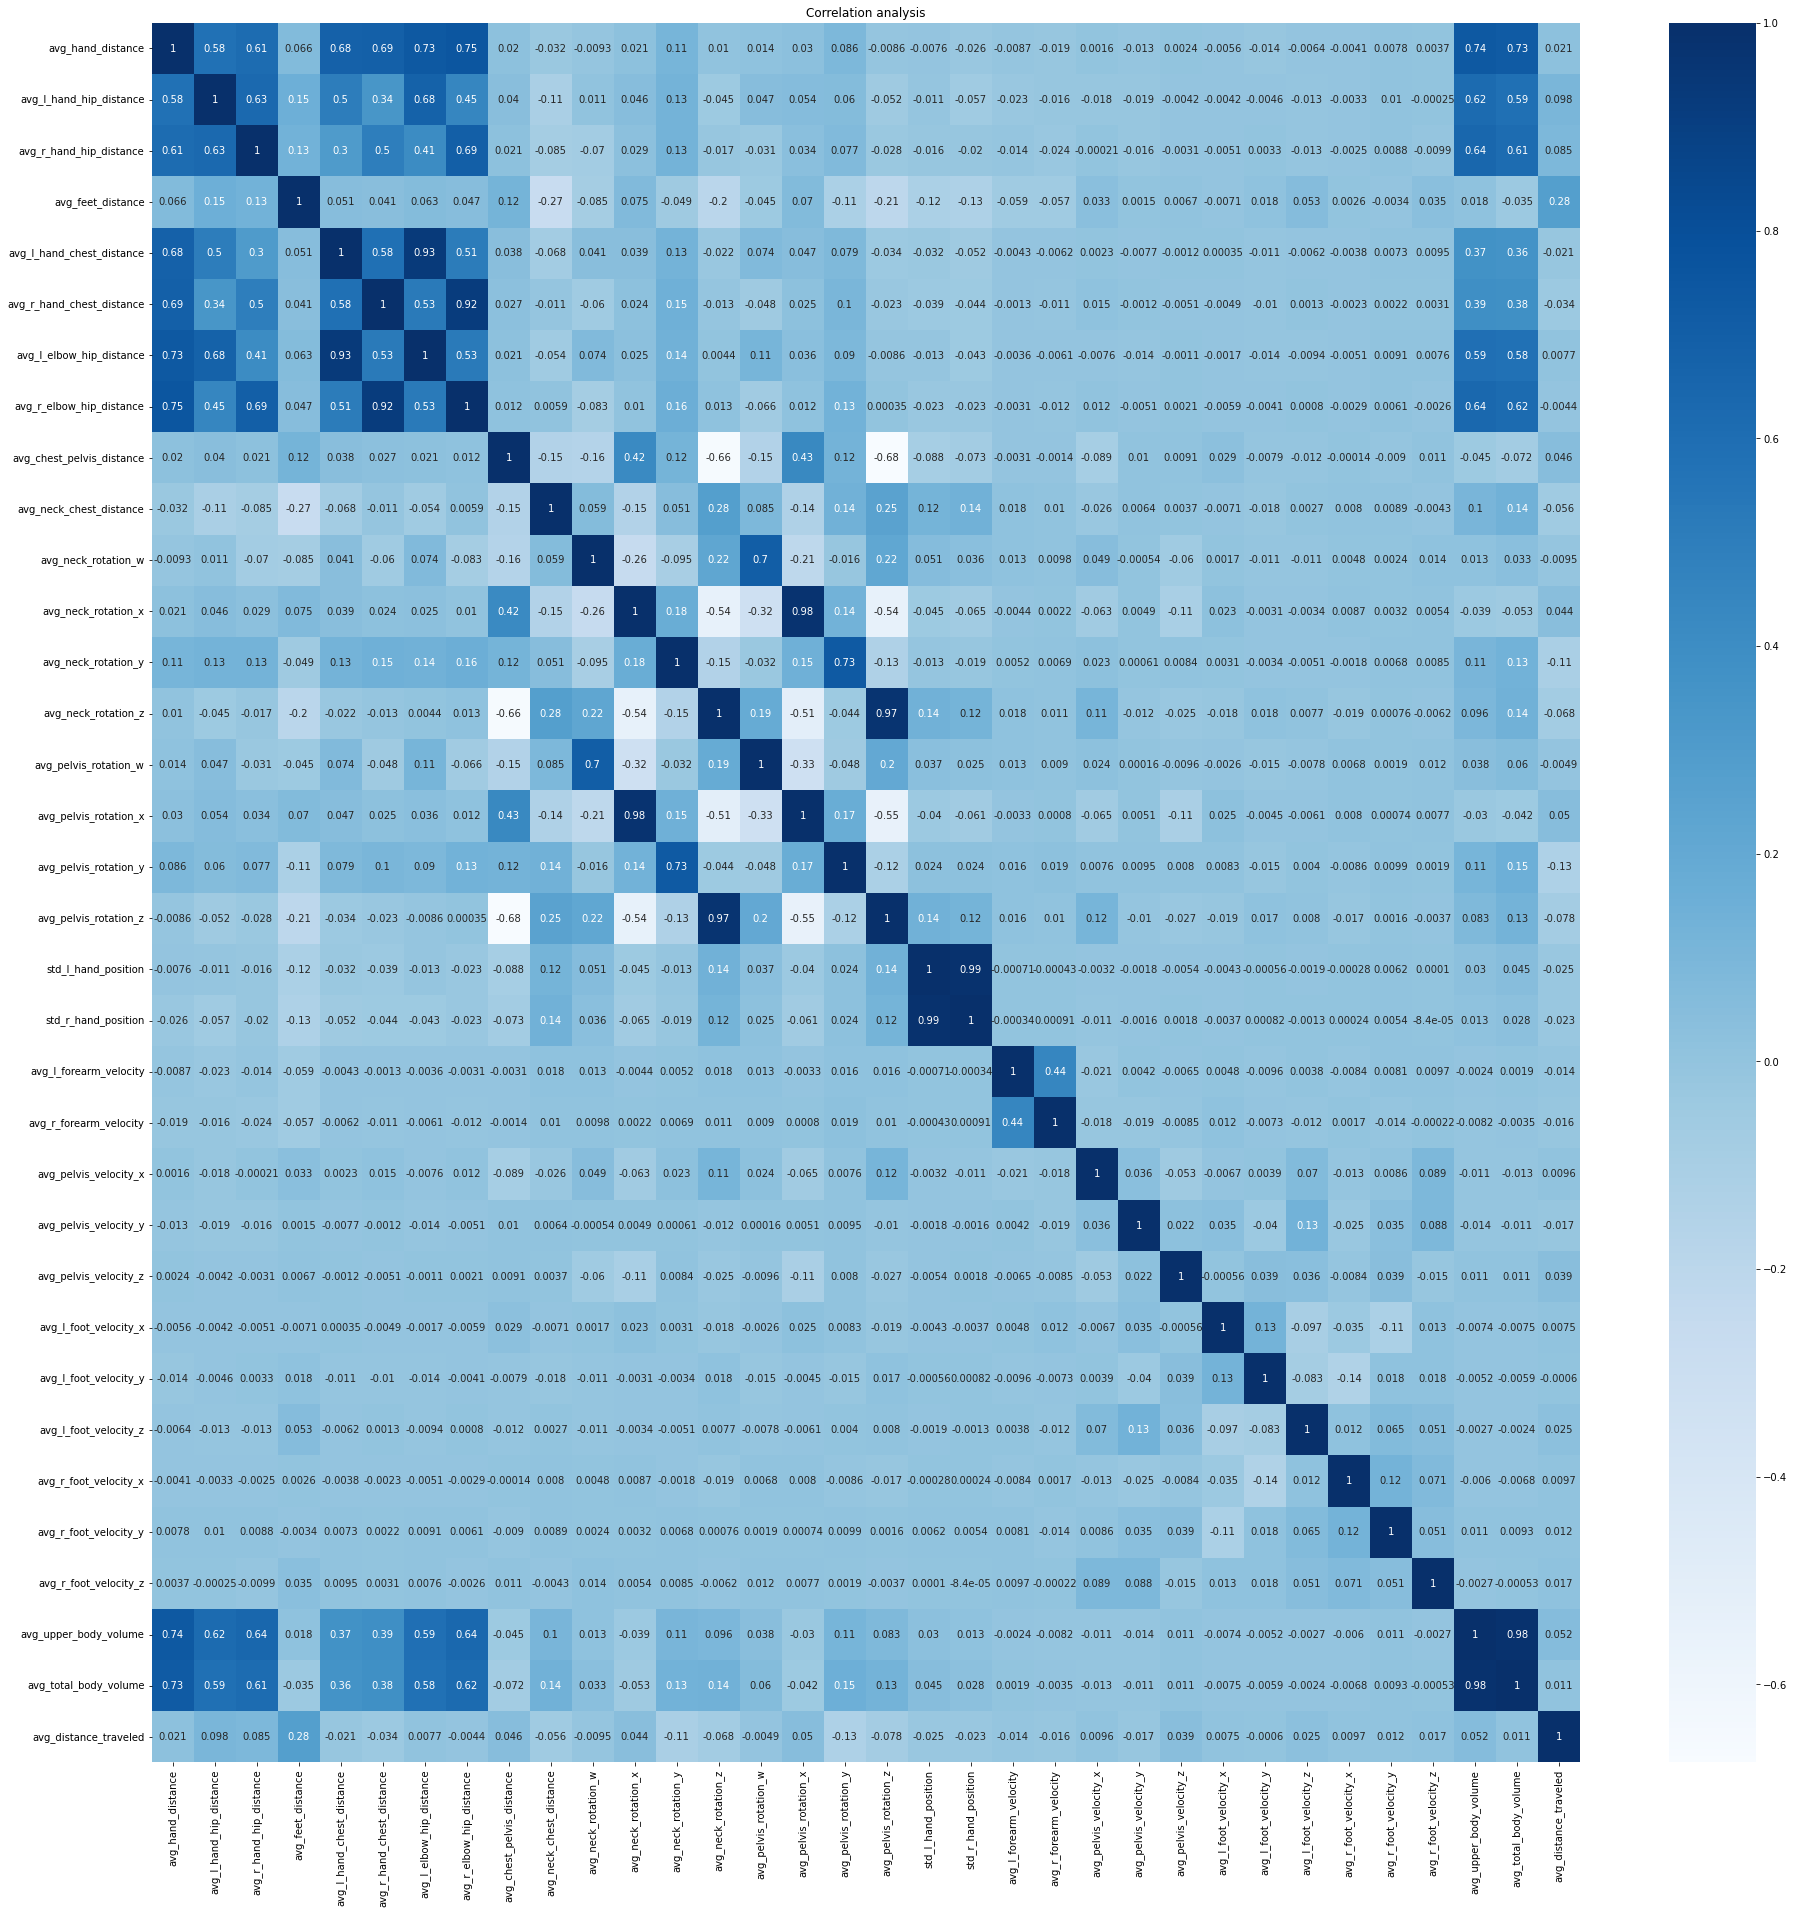

In [9]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [10]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['avg_pelvis_rotation_x', 'avg_pelvis_rotation_z', 'std_r_hand_position', 'avg_total_body_volume']


In [11]:
#X = X.drop(columns=['avg_total_body_volume'])
X = X.drop(columns=['avg_pelvis_rotation_x', 'avg_pelvis_rotation_y', 'avg_pelvis_rotation_z', 'avg_pelvis_rotation_w', 'avg_total_body_volume'])

In [12]:
#Store

fullData = X.join(y, how='right')
#fullData.to_csv(r'datasets/pa/Fs_LMA_DATA.csv', index = False)
#fullData.to_csv(r'datasets/pa/Fs_LMA_DATA_EXTRA.csv', index = False)
fullData.to_csv(r'datasets/pa/Fs2_LMA_DATA_EXTRA.csv', index = False)

In [13]:
#data = pd.read_csv('datasets/pa/Fs_LMA_DATA.csv')
data = pd.read_csv('datasets/pa/Fs2_LMA_DATA_EXTRA.csv')
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.000175,-0.5,0.6
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.000057,-0.5,0.6
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.000173,-0.5,0.6
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.000941,-0.5,0.6
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.002854,-0.5,0.6


## Data Balancing

In [52]:
data = pd.read_csv('datasets/label/LMA_DATA.csv')
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175,angry
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057,angry
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173,angry
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941,angry
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854,angry


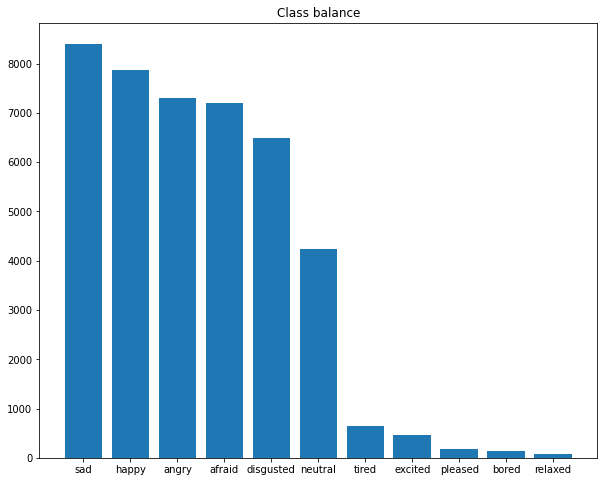

Minority class: 84
Majority class: 7296
Proportion: 0.01 : 1.0


In [53]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(10,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=angry, n=7296 (16.952%)
Class=happy, n=7876 (18.300%)
Class=sad, n=8406 (19.531%)
Class=disgusted, n=6491 (15.082%)
Class=afraid, n=7209 (16.750%)
Class=neutral, n=4237 (9.845%)
Class=pleased, n=184 (0.428%)
Class=bored, n=142 (0.330%)
Class=tired, n=654 (1.520%)
Class=relaxed, n=84 (0.195%)
Class=excited, n=460 (1.069%)


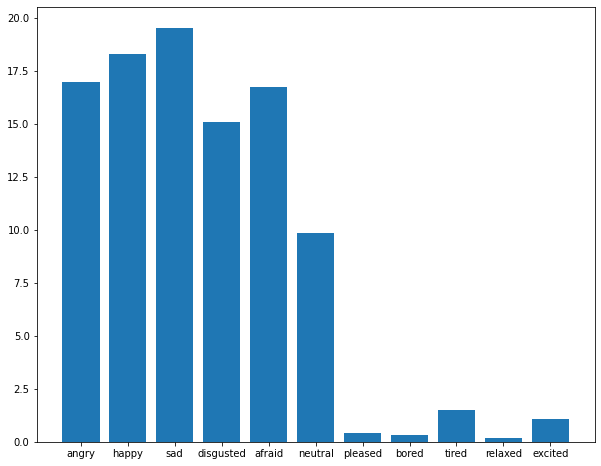

In [54]:
data = pd.read_csv('datasets/label/LMA_DATA.csv')
values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (2.323%)
Class=angry, n=1000 (2.323%)
Class=bored, n=142 (0.330%)
Class=disgusted, n=1000 (2.323%)
Class=excited, n=460 (1.069%)
Class=happy, n=1000 (2.323%)
Class=neutral, n=1000 (2.323%)
Class=pleased, n=184 (0.428%)
Class=relaxed, n=84 (0.195%)
Class=sad, n=1000 (2.323%)
Class=tired, n=654 (1.520%)


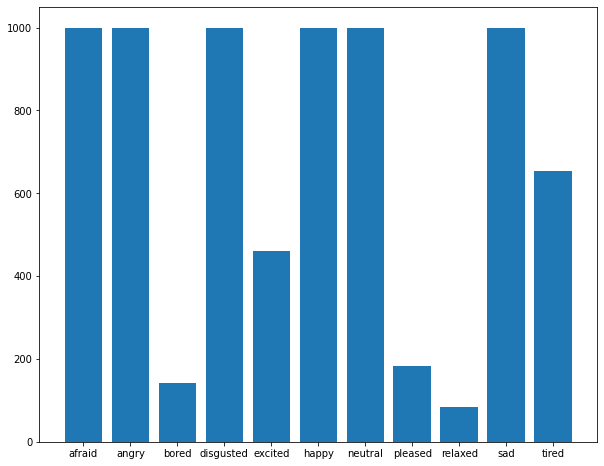

In [55]:
strategy = {"angry":1000, "happy": 1000, "sad": 1000, "disgusted": 1000, "afraid": 1000, "neutral": 1000, "pleased": 184, "bored": 142, "tired": 654, "relaxed": 84, "excited": 460}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=1000 (9.091%)
Class=angry, n=1000 (9.091%)
Class=bored, n=1000 (9.091%)
Class=disgusted, n=1000 (9.091%)
Class=excited, n=1000 (9.091%)
Class=happy, n=1000 (9.091%)
Class=neutral, n=1000 (9.091%)
Class=pleased, n=1000 (9.091%)
Class=relaxed, n=1000 (9.091%)
Class=sad, n=1000 (9.091%)
Class=tired, n=1000 (9.091%)


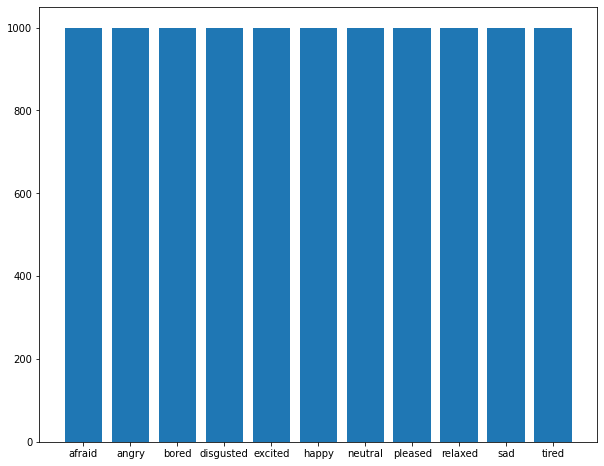

In [56]:
strategy = {"angry":1000, "happy": 1000, "sad": 1000, "disgusted": 1000, "afraid": 1000, "neutral": 1000, "pleased": 1000, "bored": 1000, "tired": 1000, "relaxed": 1000, "excited": 1000}

# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [57]:
conv_dict = {
    "angry": (-0.5, 0.6),
    "happy": (0.6, 0.5),
    "sad": (-0.6, -0.3),
    "disgusted": (-0.4, 0.25) ,
    "afraid": (-0.35, 0.7),
    "neutral": (0.0, 0.0), #note: may be worth removing neutral as it may be messing up the regressions
    "pleased": (0.7, 0.2),
    "bored": (-0.5, -0.7),
    "tired": (0.1, -0.7),
    "relaxed": (0.6, -0.54),
    "excited": (0.5, 0.7),
}

In [62]:
header = ["avg_hand_distance", "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance", "avg_feet_distance",
          "avg_l_hand_chest_distance", "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance", "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance", "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x","avg_neck_rotation_y", "avg_neck_rotation_z", 
          "avg_pelvis_rotation_w", "avg_pelvis_rotation_x", "avg_pelvis_rotation_y", "avg_pelvis_rotation_z",
          "std_l_hand_position", "std_r_hand_position",
          "avg_l_forearm_velocity", "avg_r_forearm_velocity",
          "avg_pelvis_velocity_x", "avg_pelvis_velocity_y", "avg_pelvis_velocity_z", 
          "avg_l_foot_velocity_x", "avg_l_foot_velocity_y", "avg_l_foot_velocity_z",
          "avg_r_foot_velocity_x", "avg_r_foot_velocity_y", "avg_r_foot_velocity_z", 
          "avg_upper_body_volume",
          #"avg_total_body_volume", 
          "avg_distance_traveled",
          "EMOTION_P", "EMOTION_A"
         ]

total_volume_index = data.columns.get_loc("avg_total_body_volume")

with open('datasets/pa/B_LMA_DATA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j == total_volume_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
        elif emotion == "neutral":
            continue
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])

        writer.writerow(new_row)

In [64]:
data = pd.read_csv('datasets/pa/Fs_B_LMA_DATA.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,1.392683,0.805132,0.805799,0.247039,0.715836,0.711517,0.580229,0.576592,0.286151,0.278743,...,-0.000026,0.000041,-0.000057,0.001189,-0.001889,0.008895,0.075937,0.000056,-0.35,0.7
1,1.392582,0.805015,0.806042,0.247571,0.715748,0.711626,0.580145,0.576692,0.286151,0.278760,...,-0.000032,0.000248,-0.000159,-0.011326,-0.004895,0.007414,0.075936,0.000045,-0.35,0.7
2,1.362031,0.750852,0.778974,0.387326,0.688703,0.704486,0.555093,0.571555,0.286151,0.278589,...,0.000922,-0.006888,0.003649,0.003275,-0.004558,0.006148,0.074220,0.000032,-0.35,0.7
3,1.391446,0.802226,0.804887,0.247502,0.714625,0.711143,0.579126,0.576251,0.286151,0.278767,...,-0.001768,-0.002076,0.004183,-0.000652,0.008581,0.011896,0.075866,0.000032,-0.35,0.7
4,1.362367,0.750761,0.779676,0.387258,0.688950,0.704559,0.555333,0.571585,0.286151,0.278516,...,0.001755,-0.013165,-0.001309,0.014053,-0.015203,0.001176,0.074223,0.000051,-0.35,0.7


In [65]:
data = pd.read_csv('datasets/pa/B_LMA_DATA.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,1.392683,0.805132,0.805799,0.247039,0.715836,0.711517,0.580229,0.576592,0.286151,0.278743,...,0.000041,-0.000057,0.001189,-0.001889,0.008895,0.075937,0.594780,0.000056,-0.35,0.7
1,1.392582,0.805015,0.806042,0.247571,0.715748,0.711626,0.580145,0.576692,0.286151,0.278760,...,0.000248,-0.000159,-0.011326,-0.004895,0.007414,0.075936,0.594673,0.000045,-0.35,0.7
2,1.362031,0.750852,0.778974,0.387326,0.688703,0.704486,0.555093,0.571555,0.286151,0.278589,...,-0.006888,0.003649,0.003275,-0.004558,0.006148,0.074220,0.579994,0.000032,-0.35,0.7
3,1.391446,0.802226,0.804887,0.247502,0.714625,0.711143,0.579126,0.576251,0.286151,0.278767,...,-0.002076,0.004183,-0.000652,0.008581,0.011896,0.075866,0.594068,0.000032,-0.35,0.7
4,1.362367,0.750761,0.779676,0.387258,0.688950,0.704559,0.555333,0.571585,0.286151,0.278516,...,-0.013165,-0.001309,0.014053,-0.015203,0.001176,0.074223,0.580096,0.000051,-0.35,0.7


## Data Normalization

In [14]:
#data = pd.read_csv('datasets/pa/Fs_LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/Fs_B_LMA_DATA.csv')

#data = pd.read_csv('datasets/pa/Fs_LMA_DATA_EXTRA.csv')
data = pd.read_csv('datasets/pa/Fs2_LMA_DATA_EXTRA.csv')

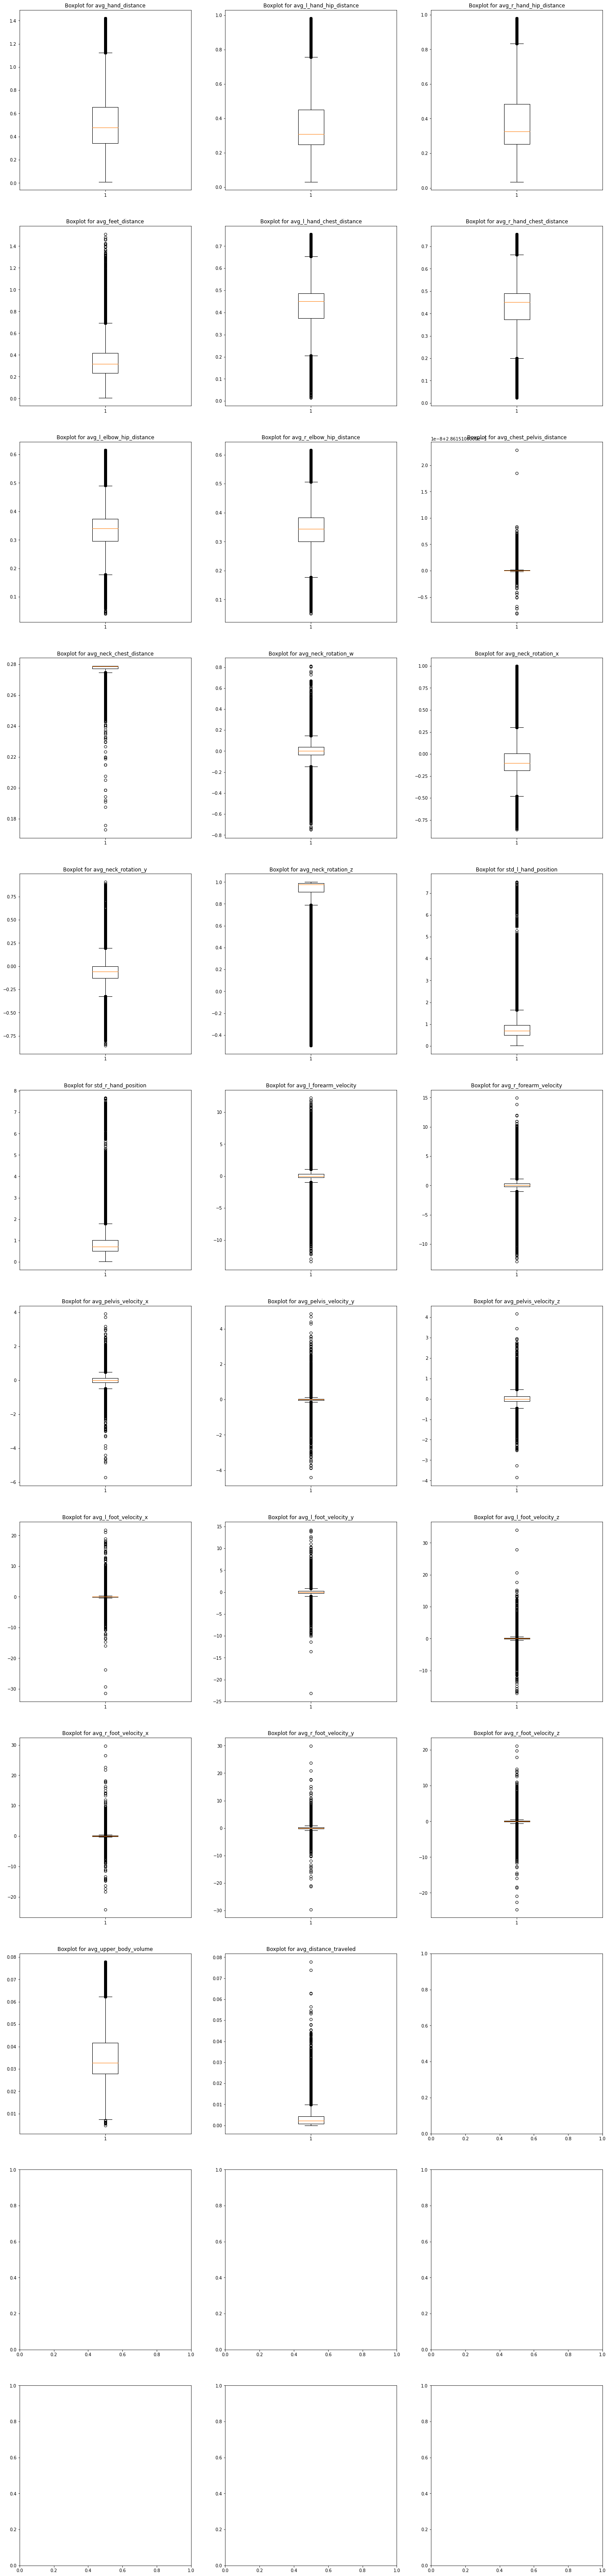

In [15]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A']], axis=1)

numeric_vars = data.columns

rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [16]:
numeric_data = data

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
count,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,...,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000,56359.000000
mean,0.367695,0.355180,0.369412,0.220811,0.566060,0.563194,0.525927,0.526005,0.268261,0.982751,...,0.476689,0.481484,0.590970,0.619540,0.335810,0.448866,0.497260,0.538220,0.425272,0.040005
std,0.202550,0.186498,0.194010,0.104985,0.165298,0.164742,0.154992,0.155787,0.023084,0.035437,...,0.027723,0.044619,0.017908,0.027408,0.022765,0.016647,0.017627,0.026216,0.175847,0.045757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235697,0.227745,0.229572,0.150450,0.485346,0.479338,0.442838,0.441374,0.261946,0.983840,...,0.473055,0.466710,0.589070,0.613349,0.333209,0.447159,0.493543,0.535328,0.315856,0.008998
50%,0.330885,0.290948,0.306292,0.206597,0.590249,0.585671,0.521892,0.518538,0.262930,0.996698,...,0.476847,0.481116,0.590756,0.619553,0.335883,0.448812,0.497446,0.538330,0.381172,0.027546
75%,0.456548,0.441359,0.475703,0.272813,0.637118,0.637806,0.578867,0.587234,0.264759,0.999185,...,0.480323,0.495680,0.592447,0.625274,0.338684,0.450471,0.501021,0.541539,0.503980,0.056115
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


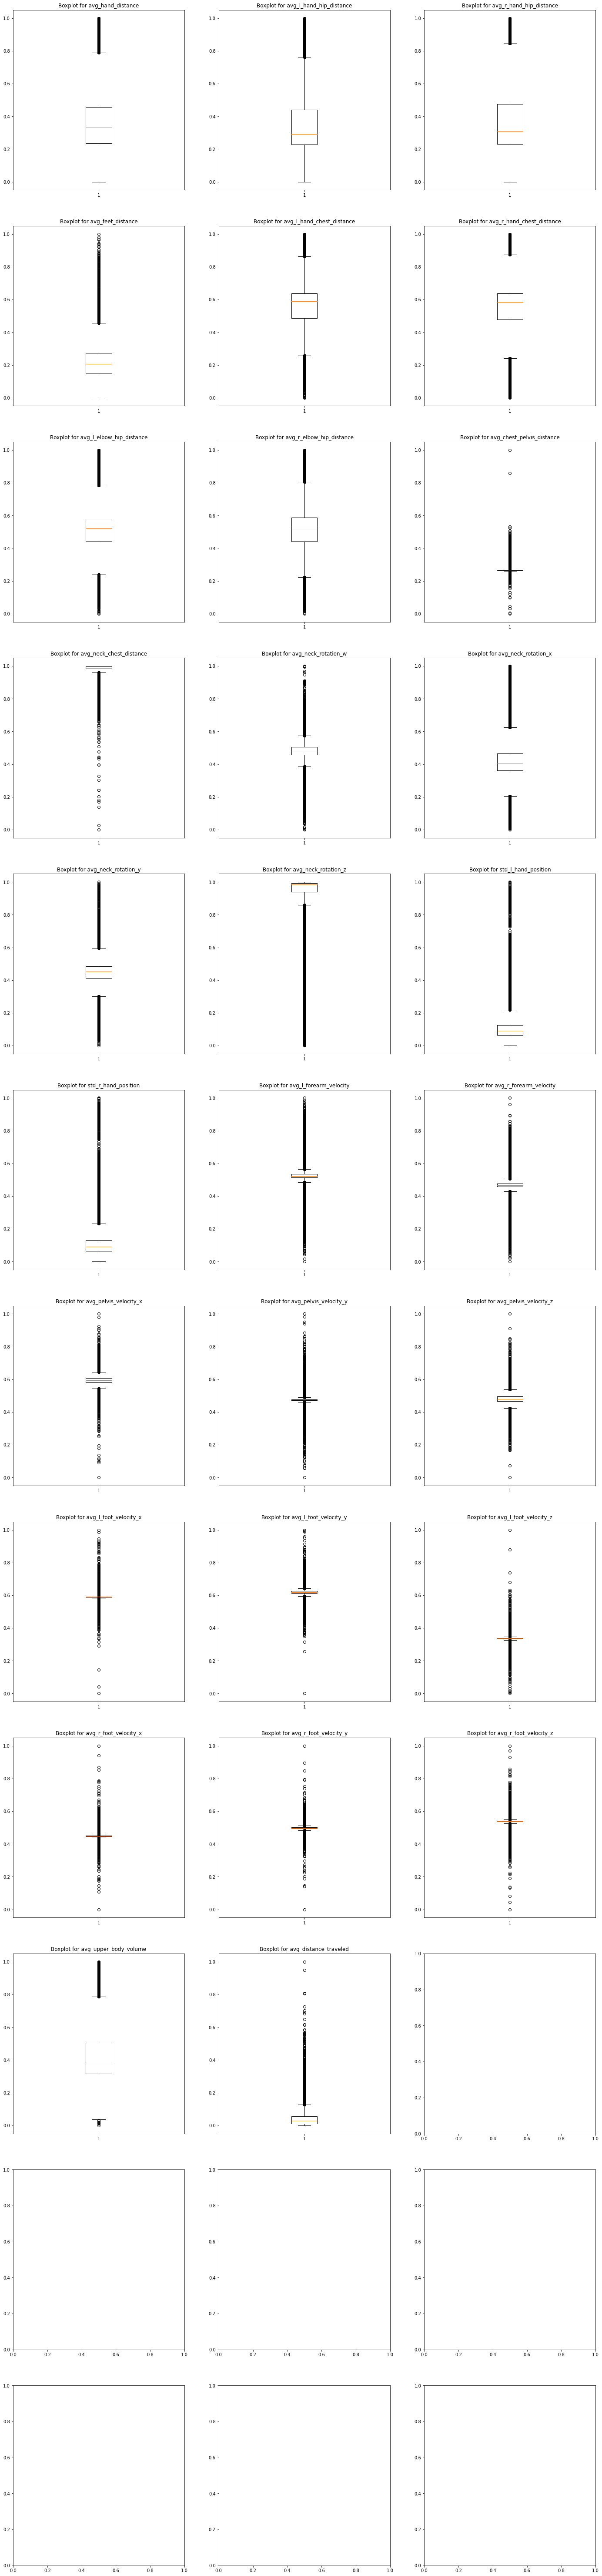

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,0.304963,0.249669,0.208571,0.169970,0.615432,0.587617,0.540749,0.502008,0.263641,0.998607,...,0.479031,0.479447,0.590727,0.619439,0.335815,0.448783,0.497374,0.538253,0.326178,0.002254
1,0.302299,0.247811,0.207149,0.175342,0.614322,0.586766,0.539741,0.500978,0.262102,0.998626,...,0.477295,0.480878,0.590723,0.619518,0.335643,0.448779,0.497424,0.538060,0.325341,0.000730
2,0.297500,0.244828,0.204358,0.180618,0.612591,0.585118,0.538315,0.499026,0.261517,0.998649,...,0.476715,0.481794,0.590741,0.619841,0.335589,0.448796,0.497627,0.537999,0.323754,0.002218
3,0.290709,0.243226,0.198080,0.186578,0.611939,0.581283,0.538040,0.494541,0.263249,0.998806,...,0.473486,0.475433,0.590101,0.619618,0.335829,0.448163,0.497486,0.538269,0.321151,0.012095
4,0.279494,0.242560,0.192318,0.192319,0.589051,0.563385,0.522330,0.480499,0.262581,0.998421,...,0.470431,0.523631,0.591005,0.615958,0.336400,0.449058,0.495190,0.538907,0.328638,0.036687


In [17]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [18]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
#minMaxDataFull.to_csv(r'datasets/pa/Fs_B_N_LMA_DATA.csv', index = False)
#minMaxDataFull.to_csv(r'datasets/pa/Fs_N_LMA_DATA.csv', index = False)

#minMaxDataFull.to_csv(r'datasets/pa/Fs_N_LMA_DATA_EXTRA.csv', index = False)
minMaxDataFull.to_csv(r'datasets/pa/Fs2_N_LMA_DATA_EXTRA.csv', index = False)

In [19]:
#data = pd.read_csv('datasets/pa/Fs_B_N_LMA_DATA.csv')
#data = pd.read_csv('datasets/pa/Fs_N_LMA_DATA_EXTRA.csv')

data = pd.read_csv('datasets/pa/Fs2_N_LMA_DATA_EXTRA.csv')

data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled,EMOTION_P,EMOTION_A
0,0.304963,0.249669,0.208571,0.169970,0.615432,0.587617,0.540749,0.502008,0.263641,0.998607,...,0.590727,0.619439,0.335815,0.448783,0.497374,0.538253,0.326178,0.002254,-0.5,0.6
1,0.302299,0.247811,0.207149,0.175342,0.614322,0.586766,0.539741,0.500978,0.262102,0.998626,...,0.590723,0.619518,0.335643,0.448779,0.497424,0.538060,0.325341,0.000730,-0.5,0.6
2,0.297500,0.244828,0.204358,0.180618,0.612591,0.585118,0.538315,0.499026,0.261517,0.998649,...,0.590741,0.619841,0.335589,0.448796,0.497627,0.537999,0.323754,0.002218,-0.5,0.6
3,0.290709,0.243226,0.198080,0.186578,0.611939,0.581283,0.538040,0.494541,0.263249,0.998806,...,0.590101,0.619618,0.335829,0.448163,0.497486,0.538269,0.321151,0.012095,-0.5,0.6
4,0.279494,0.242560,0.192318,0.192319,0.589051,0.563385,0.522330,0.480499,0.262581,0.998421,...,0.591005,0.615958,0.336400,0.449058,0.495190,0.538907,0.328638,0.036687,-0.5,0.6
